In [3]:
# import packages
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='SimHei', size=13)

import os,gc,re,warnings,sys
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Arial' 

In [4]:
path = './data_raw/'

#####train
trn_click = pd.read_csv(path+'train_click_log.csv')
item_df = pd.read_csv(path+'articles.csv')
item_df = item_df.rename(columns={'article_id': 'click_article_id'}) 
item_emb_df = pd.read_csv(path+'articles_emb.csv')

#####test
tst_click = pd.read_csv(path+'testA_click_log.csv')

In [5]:
# rank each users' click timestamp
trn_click['rank'] = trn_click.groupby(['user_id'])['click_timestamp'].rank(ascending=False).astype(int)
tst_click['rank'] = tst_click.groupby(['user_id'])['click_timestamp'].rank(ascending=False).astype(int)

In [6]:
#calculate users' number of clicks，adding a new column of count
trn_click['click_cnts'] = trn_click.groupby(['user_id'])['click_timestamp'].transform('count')
tst_click['click_cnts'] = tst_click.groupby(['user_id'])['click_timestamp'].transform('count')

In [7]:
trn_click = trn_click.merge(item_df, how='left', on=['click_article_id'])
trn_click.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,rank,click_cnts,category_id,created_at_ts,words_count
0,199999,160417,1507029570190,4,1,17,1,13,1,11,11,281,1506942089000,173
1,199999,5408,1507029571478,4,1,17,1,13,1,10,11,4,1506994257000,118
2,199999,50823,1507029601478,4,1,17,1,13,1,9,11,99,1507013614000,213
3,199998,157770,1507029532200,4,1,17,1,25,5,40,40,281,1506983935000,201
4,199998,96613,1507029671831,4,1,17,1,25,5,39,40,209,1506938444000,185


In [11]:
trn_click.groupby('user_id')['click_article_id'].count().min()  # users in training set clicks at least two articles


2

In [12]:
trn_click.user_id.nunique()


200000

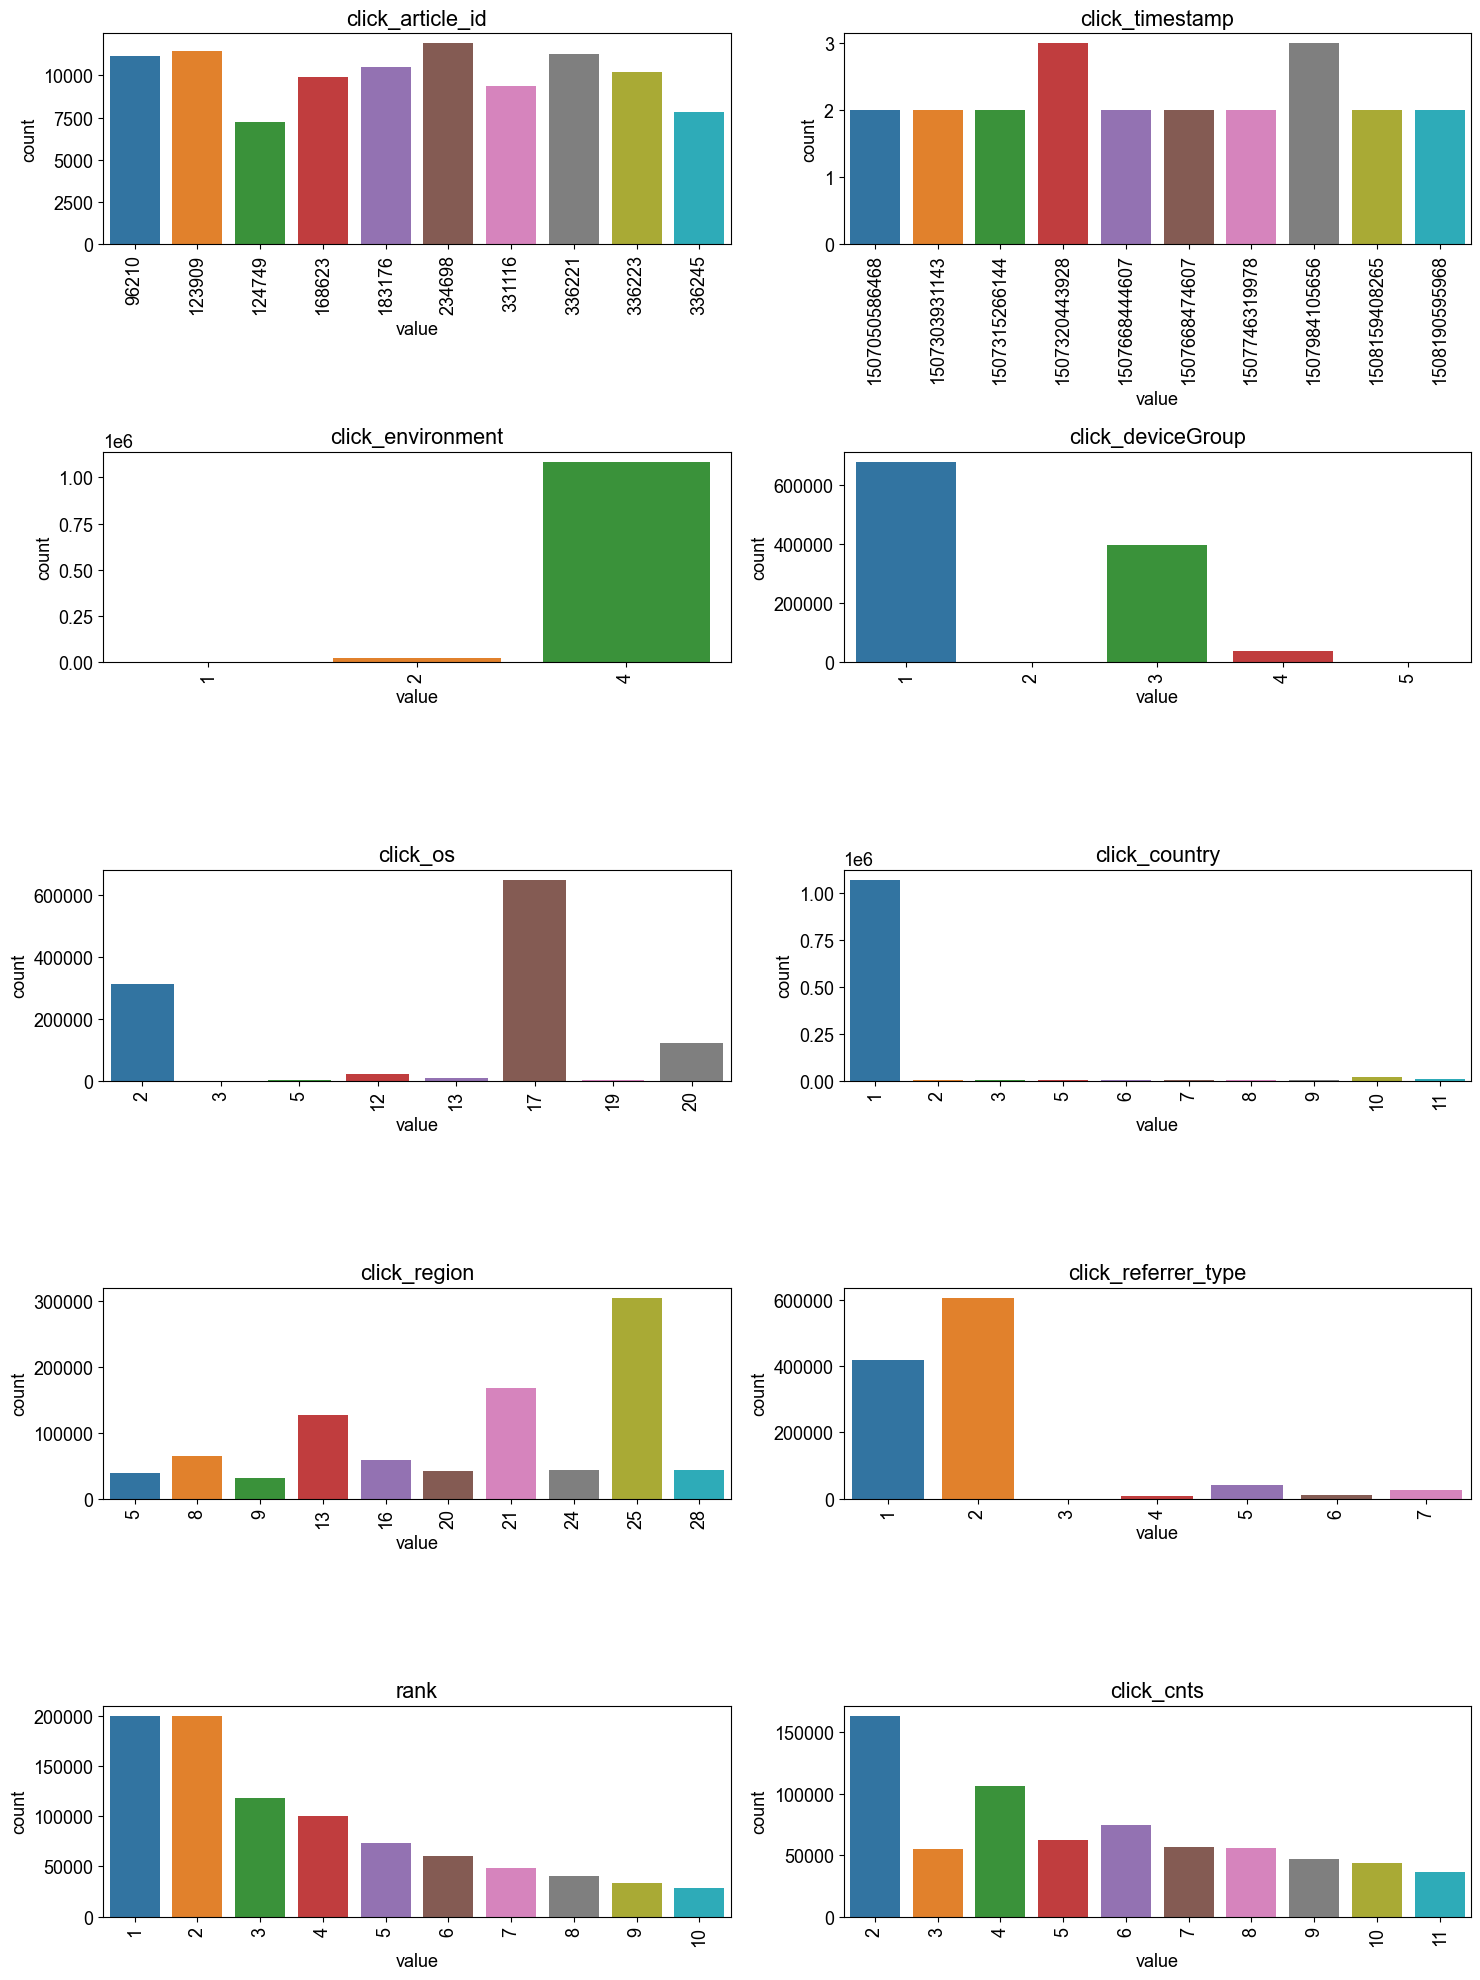

In [13]:
# Set the figure size once
plt.figure(figsize=(15, 20))

i = 1  # Counter for subplot index
for col in ['click_article_id', 'click_timestamp', 'click_environment', 'click_deviceGroup', 
            'click_os', 'click_country', 'click_region', 'click_referrer_type', 'rank', 'click_cnts']:
    
    # Create subplot
    plt.subplot(5, 2, i)
    i += 1
    
    # Get the top 10 most frequent values for the column
    v = trn_click[col].value_counts().reset_index()[:10]
    
    # Plot the bar chart
    v.columns = ['value', 'count']  # Rename columns to make them clear

    sns.barplot(x=v['value'], y=v['count'])
    #sns.barplot(x=v['index'], y=v[col])
    
    # Rotate x-tick labels for better visibility
    plt.xticks(rotation=90)
    
    # Set the title for each subplot
    plt.title(col)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
tst_click = tst_click.merge(item_df, how='left', on=['click_article_id'])
tst_click.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,rank,click_cnts,category_id,created_at_ts,words_count
0,249999,160974,1506959142820,4,1,17,1,13,2,19,19,281,1506912747000,259
1,249999,160417,1506959172820,4,1,17,1,13,2,18,19,281,1506942089000,173
2,249998,160974,1506959056066,4,1,12,1,13,2,5,5,281,1506912747000,259
3,249998,202557,1506959086066,4,1,12,1,13,2,4,5,327,1506938401000,219
4,249997,183665,1506959088613,4,1,17,1,15,5,7,7,301,1500895686000,256


In [15]:
tst_click.user_id.nunique()

50000

In [16]:
tst_click.groupby('user_id')['click_article_id'].count().min() # some users in test dataset clicked only once

1

In [17]:
# browse artilce dataset

combined_df = pd.concat([item_df.head(), item_df.tail()])
print(combined_df)

        click_article_id  category_id  created_at_ts  words_count
0                      0            0  1513144419000          168
1                      1            1  1405341936000          189
2                      2            1  1408667706000          250
3                      3            1  1408468313000          230
4                      4            1  1407071171000          162
364042            364042          460  1434034118000          144
364043            364043          460  1434148472000          463
364044            364044          460  1457974279000          177
364045            364045          460  1515964737000          126
364046            364046          460  1505811330000          479


In [18]:
item_df['words_count'].value_counts()


words_count
176     3485
182     3480
179     3463
178     3458
174     3456
        ... 
556        1
625        1
2798       1
767        1
841        1
Name: count, Length: 866, dtype: int64

461


<Axes: >

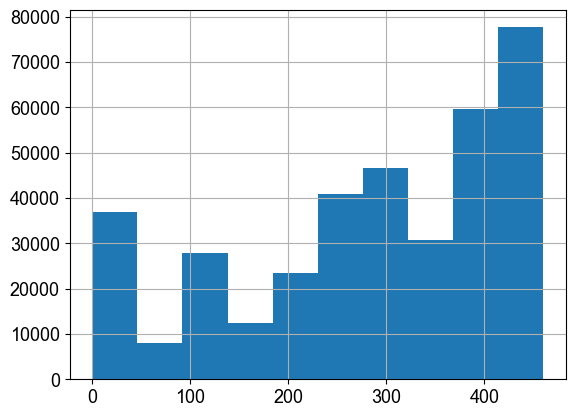

In [19]:
print(item_df['category_id'].nunique())     
item_df['category_id'].hist()


In [20]:
item_df.shape       # 364047 articles

(364047, 4)

In [21]:
item_emb_df.head()

,article_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_240,emb_241,emb_242,emb_243,emb_244,emb_245,emb_246,emb_247,emb_248,emb_249
0,0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,...,-0.487843,0.823124,0.412688,-0.338654,0.320786,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


In [22]:
item_emb_df.shape

(364047, 251)

In [23]:
#####merge
user_click_merge = pd.concat([trn_click,tst_click])

In [24]:
#
user_click_count = user_click_merge.groupby(['user_id', 'click_article_id'])['click_timestamp'].agg({'count'}).reset_index()
user_click_count[:10]

,user_id,click_article_id,count
0,0,30760,1
1,0,157507,1
2,1,63746,1
3,1,289197,1
4,2,36162,1
5,2,168401,1
6,3,36162,1
7,3,50644,1
8,4,39894,1
9,4,42567,1


In [25]:
user_click_count[user_click_count['count']>7]

,user_id,click_article_id,count
311242,86295,74254,10
311243,86295,76268,10
393761,103237,205948,10
393763,103237,235689,10
576902,134850,69463,13


In [26]:
user_click_count['count'].unique()

array([ 1,  2,  4,  3,  6,  5, 10,  7, 13])

In [27]:
#number of clicks per user
user_click_count.loc[:,'count'].value_counts() 

count
1     1605541
2       11621
3         422
4          77
5          26
6          12
10          4
7           3
13          1
Name: count, dtype: int64

In [28]:
def plot_envs(df, cols, r, c):
    plt.figure()
    plt.figure(figsize=(10, 5))
    i = 1
    for col in cols:
        plt.subplot(r, c, i)
        i += 1
        v = df[col].value_counts().reset_index()
        fig = sns.barplot(x=v['index'], y=v[col])
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(col)
    plt.tight_layout()
    plt.show()

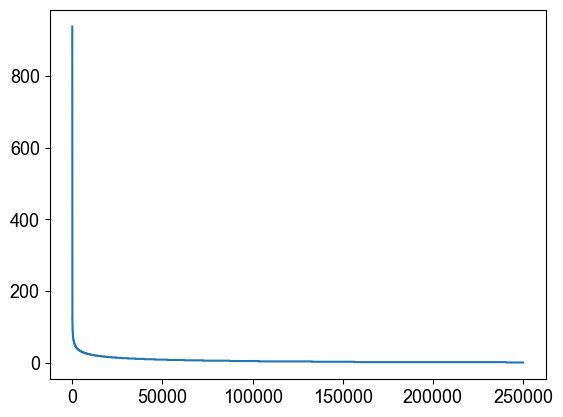

In [31]:
user_click_item_count = sorted(user_click_merge.groupby('user_id')['click_article_id'].count(), reverse=True)
plt.plot(user_click_item_count)

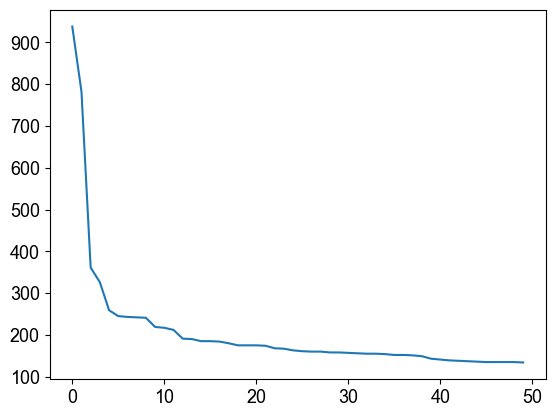

In [32]:
# top 50 users with most clicks
plt.plot(user_click_item_count[:50])

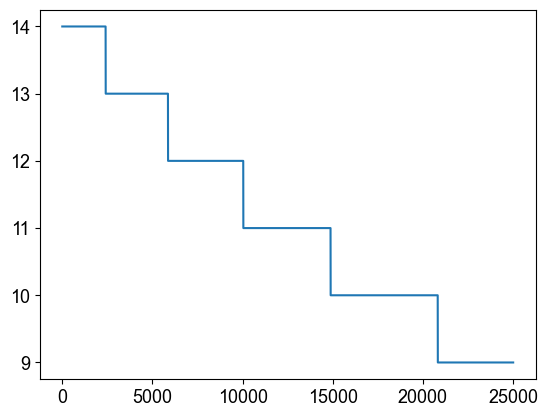

In [33]:
#plot click times[25000:50000]
plt.plot(user_click_item_count[25000:50000])

In [34]:
## News click through count analysis

In [35]:
item_click_count = sorted(user_click_merge.groupby('click_article_id')['user_id'].count(), reverse=True)

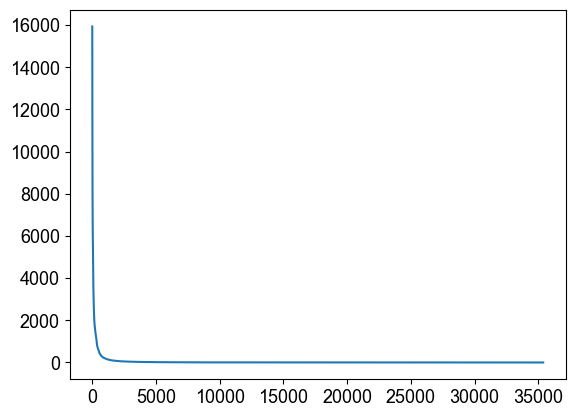

In [36]:
plt.plot(item_click_count)

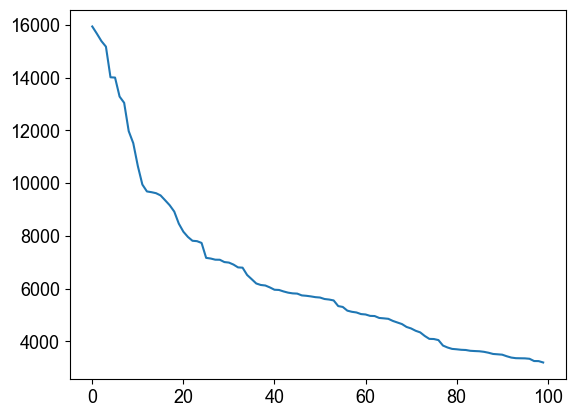

In [37]:
plt.plot(item_click_count[:100])

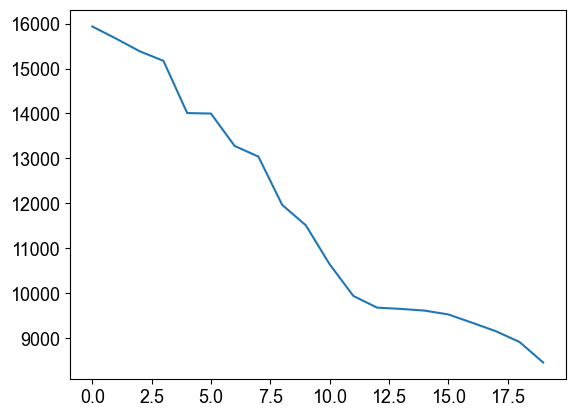

In [38]:
plt.plot(item_click_count[:20])

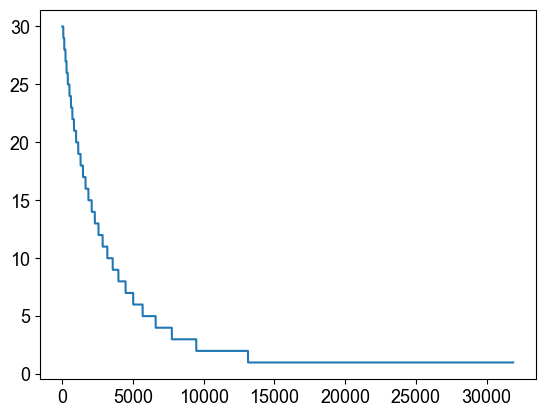

In [39]:
plt.plot(item_click_count[3500:])

## Article co-occurence analysis

In [40]:
tmp = user_click_merge.sort_values('click_timestamp')
tmp['next_item'] = tmp.groupby(['user_id'])['click_article_id'].transform(lambda x:x.shift(-1))
union_item = tmp.groupby(['click_article_id','next_item'])['click_timestamp'].agg({'count'}).reset_index().sort_values('count', ascending=False)
union_item[['count']].describe()

,count
count,433597.000000
mean,3.184139
std,18.851753
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2202.000000


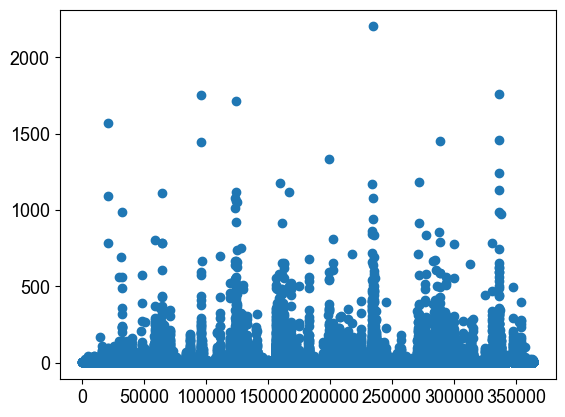

In [41]:
x = union_item['click_article_id']
y = union_item['count']
plt.scatter(x, y)

## Article information

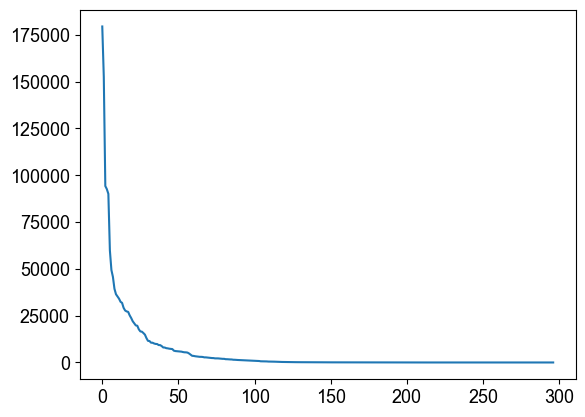

In [42]:
#the occurrence count of different types of news articles in a dataset
plt.plot(user_click_merge['category_id'].value_counts().values)

In [43]:
#descriptive statistics of news word count
user_click_merge['words_count'].describe()

count    1.630633e+06
mean     2.043012e+02
std      6.382198e+01
min      0.000000e+00
25%      1.720000e+02
50%      1.970000e+02
75%      2.290000e+02
max      6.690000e+03
Name: words_count, dtype: float64

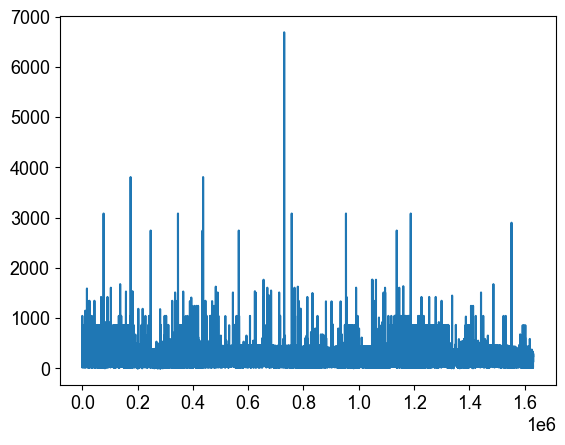

In [44]:
plt.plot(user_click_merge['words_count'].values)

## Users' preference for class of articles

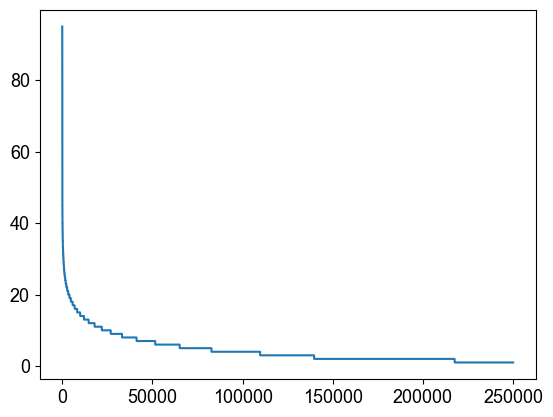

In [45]:
plt.plot(sorted(user_click_merge.groupby('user_id')['category_id'].nunique(), reverse=True))

In [46]:
user_click_merge.groupby('user_id')['category_id'].nunique().reset_index().describe()

,user_id,category_id
count,250000.000000,250000.000000
mean,124999.500000,4.573188
std,72168.927986,4.419800
min,0.000000,1.000000
25%,62499.750000,2.000000
50%,124999.500000,3.000000
75%,187499.250000,6.000000
max,249999.000000,95.000000


## The distribution of the length of articles viewed by users

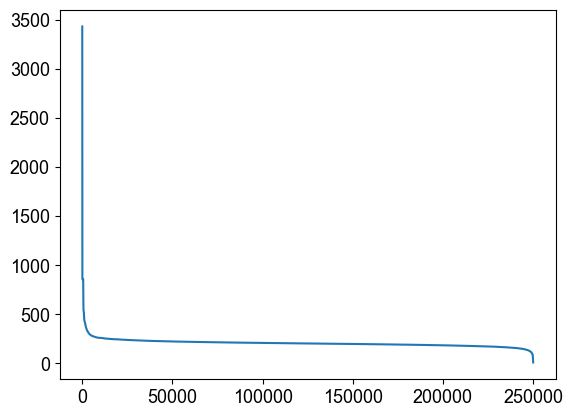

In [47]:
plt.plot(sorted(user_click_merge.groupby('user_id')['words_count'].mean(), reverse=True))

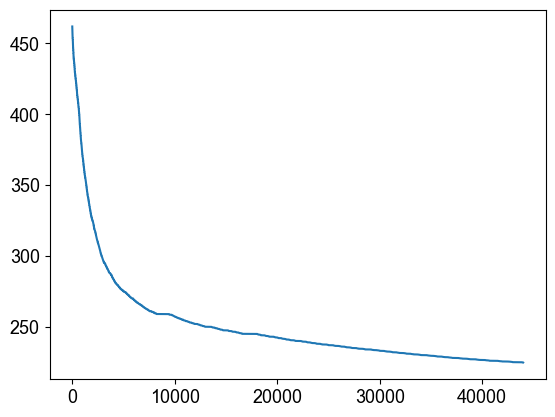

In [48]:
# a detailed look to [1000,45000]
plt.plot(sorted(user_click_merge.groupby('user_id')['words_count'].mean(), reverse=True)[1000:45000])

Most users are viewing articles fewer than 250 words.

In [49]:
#more detailed parameters
user_click_merge.groupby('user_id')['words_count'].mean().reset_index().describe()

,user_id,words_count
count,250000.000000,250000.000000
mean,124999.500000,205.830189
std,72168.927986,47.174030
min,0.000000,8.000000
25%,62499.750000,187.500000
50%,124999.500000,202.000000
75%,187499.250000,217.750000
max,249999.000000,3434.500000


## Analysis of the time users click on news

In [50]:
# normalize time stamp for better visualization
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
user_click_merge['click_timestamp'] = mm.fit_transform(user_click_merge[['click_timestamp']])
user_click_merge['created_at_ts'] = mm.fit_transform(user_click_merge[['created_at_ts']])
user_click_merge = user_click_merge.sort_values('click_timestamp')

In [ ]:
# Define the function to calculate the mean difference
def mean_diff_time_func(group, col_name):
    return group[col_name].diff().mean()

# Apply the function to calculate the mean difference for 'created_at_ts'
mean_diff_created_time = (
    user_click_merge.groupby('user_id')
    .apply(lambda x: mean_diff_time_func(x.sort_values('click_timestamp'), 'created_at_ts'))
)

In [ ]:
plt.plot(sorted(mean_diff_created_time.values, reverse=True))

In [ ]:
# Distribution of similarity between consecutive articles viewed by each user
item_idx_2_rawid_dict = dict(zip(item_emb_df['article_id'], item_emb_df.index))

In [ ]:
del item_emb_df['article_id']

In [ ]:
item_emb_np = np.ascontiguousarray(item_emb_df.values, dtype=np.float32)

In [ ]:
#randomly select five users and see the similarity among the articles they read
sub_user_ids = np.random.choice(user_click_merge.user_id.unique(), size=15, replace=False)
sub_user_info = user_click_merge[user_click_merge['user_id'].isin(sub_user_ids)]

sub_user_info.head()

In [ ]:
def get_item_sim_list(df):
    sim_list = []
    item_list = df['click_article_id'].values
    
    # Precompute norms for embeddings
    norms = {item: np.linalg.norm(item_emb_np[item_idx_2_rawid_dict[item]]) 
             for item in item_list if item in item_idx_2_rawid_dict}
    
    for i in range(len(item_list) - 1):
        if item_list[i] in item_idx_2_rawid_dict and item_list[i+1] in item_idx_2_rawid_dict:
            emb1 = item_emb_np[item_idx_2_rawid_dict[item_list[i]]]
            emb2 = item_emb_np[item_idx_2_rawid_dict[item_list[i+1]]]
            norm1 = norms[item_list[i]]
            norm2 = norms[item_list[i+1]]
            # Avoid division by zero
            if norm1 > 0 and norm2 > 0:
                sim = np.dot(emb1, emb2) / (norm1 * norm2)
            else:
                sim = 0
        else:
            sim = 0  # Handle missing items
        sim_list.append(sim)
    
    # Append 0 for the last item
    sim_list.append(0)
    return sim_list


In [ ]:
for _, user_df in sub_user_info.groupby('user_id'):
    item_sim_list = get_item_sim_list(user_df)
    plt.plot(item_sim_list)

From the graph, we can see that the similarity between consecutive products viewed by some users fluctuates significantly, while for others, the fluctuations are smaller. This shows a certain level of distinction.